### Fourier component

In [4]:
import numpy as np
from numpy import fft
from matplotlib import pyplot as plt

def fourierExtrapolation(x, n_predict, n_harm):
    n = x.size                      # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    
    # sort indexes by frequency
    indexes.sort(key = lambda i: np.absolute(f[i]))
    
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    

### The function above will preform a fft on data and use the first n_harm frequencies to reconstruct the data(ignoring the high frequency part) 

In [5]:
silso_monthly = np.loadtxt('SILSO_monthly_inJD.txt')

n = 0

x = silso_monthly[:,2]
t = silso_monthly[:,1]

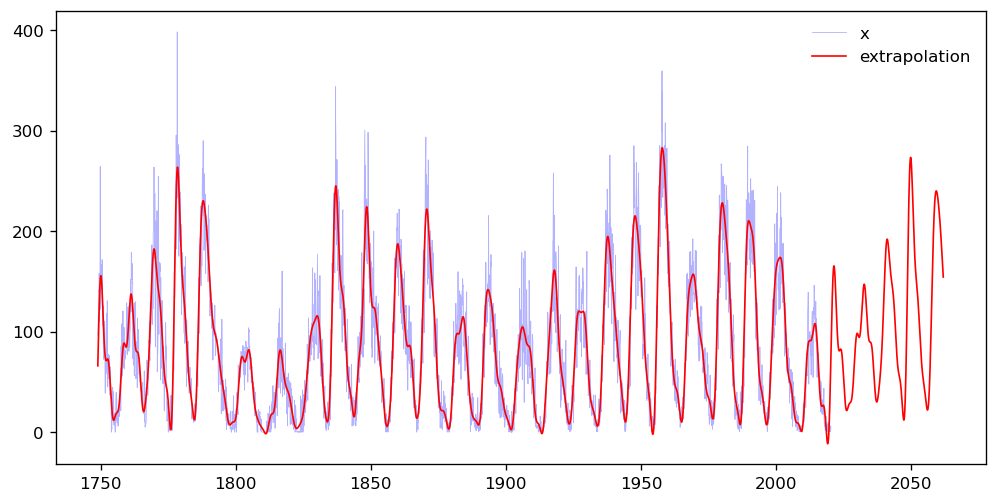

In [6]:
n_predict = 500
n_harm    = 100
extrapolation = fourierExtrapolation(x, n_predict, n_harm)

step = (t[-1]-t[0])/len(t)

extra_frac_year = np.arange(t[0], t[-1]+n_predict*step, step)

fig,ax = plt.subplots(figsize=(10,5), dpi=120)

plt.plot(t, x, 'b', label = 'x', lw=0.5, alpha=0.3)
plt.plot(extra_frac_year, extrapolation, 'r', label = 'extrapolation', lw=1)

plt.legend(frameon=0)
plt.show()

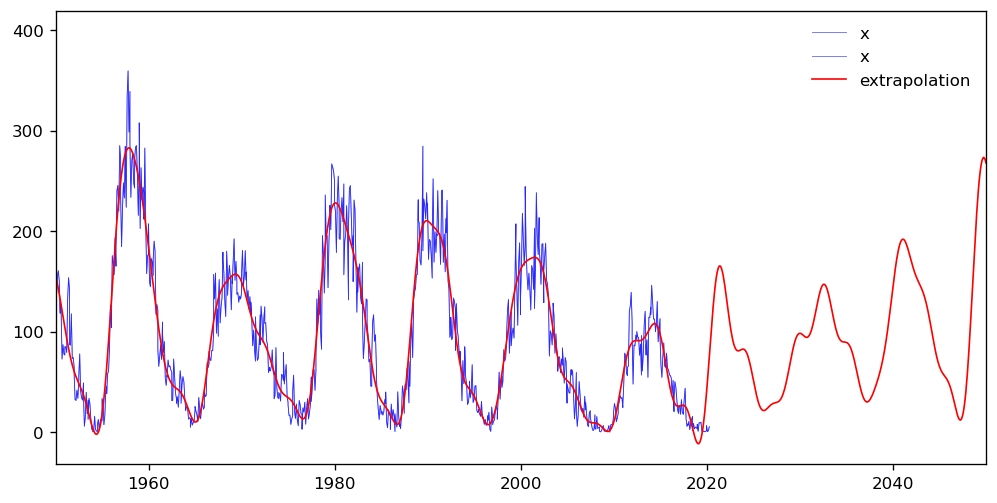

In [7]:
fig,ax = plt.subplots(figsize=(10,5), dpi=120)

plt.plot(t, x, 'b', label = 'x', lw=0.5, alpha=0.6)
plt.plot(silso_monthly[:,1], silso_monthly[:,2], 'b', label = 'x', lw=0.5, alpha=0.6)
plt.plot(extra_frac_year, extrapolation, 'r', label = 'extrapolation', lw=1)

plt.xlim([1950,2050])

plt.legend(frameon=0)
plt.show()